In [12]:
import pandas as pd
import mysql.connector
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


In [40]:
# remote.close()
import mysql.connector
remote = mysql.connector.connect(
    host = "database-1.***************.amazonaws.com", #insert sql path
    port = 3306,
    user = "eda",
    password = "********",
    database= 'eda'
)
cur = remote.cursor(buffered=True)

In [7]:
df_list=[]
for city in ['서울특별시','경기도']:
    sql = """ select pop_sum,0_19,20_100,예산,gdp,pop_foreign,price,rent,count,요양기관수 from pop_reason
            where city='{}'
            order by year
        
            ; 
        """.format(city)

    cur.execute(sql)
    result = cur.fetchall()
    # for line in result:
    #     print(line)
    df_list.append(pd.DataFrame(result, columns=['{} 총인구수'.format(city),'{} 0_19세'.format(city),'{} 20_100세'.format(city),'{} 교육예산'.format(city),'{} gdp'.format(city),'{} 외국인 인구수'.format(city),'{} 매매가'.format(city),'{} 전세가'.format(city),'{} 거래량'.format(city),'{} 요양기관수'.format(city),]))
    # remote.commit()

In [8]:
df_list[0].head()

,서울특별시 총인구수,서울특별시 0_19세,서울특별시 20_100세,서울특별시 교육예산,서울특별시 gdp,서울특별시 외국인 인구수,서울특별시 매매가,서울특별시 전세가,서울특별시 거래량,서울특별시 요양기관수
0,10143645,1904547,8239098,7.399390e+12,354319250,395640,5067,2944,16968,84251.0
1,10103233,1838505,8264728,7.439130e+12,359661759,415059,5147,3078,16935,84752.0
2,10022181,1769089,8253092,7.690090e+12,370167867,408083,5423,3499,20716,85785.0
3,9930616,1695519,8235097,8.001290e+12,380679274,404037,5517,3588,24725,86732.0
4,9857426,1623118,8234308,8.165790e+12,389584629,413943,6688,4424,25654,87820.0


In [10]:
df_concat=pd.concat(df_list,axis=1)

In [11]:
df_concat.head()

,서울특별시 총인구수,서울특별시 0_19세,서울특별시 20_100세,서울특별시 교육예산,서울특별시 gdp,서울특별시 외국인 인구수,서울특별시 매매가,서울특별시 전세가,서울특별시 거래량,서울특별시 요양기관수,경기도 총인구수,경기도 0_19세,경기도 20_100세,경기도 교육예산,경기도 gdp,경기도 외국인 인구수,경기도 매매가,경기도 전세가,경기도 거래량,경기도 요양기관수
0,10143645,1904547,8239098,7.399390e+12,354319250,395640,5067,2944,16968,84251.0,12234630,2832378,9402252,1.093360e+13,346430719,440735,2794,1782,29429,68897.0
1,10103233,1838505,8264728,7.439130e+12,359661759,415059,5147,3078,16935,84752.0,12357830,2777854,9579976,1.127850e+13,362159526,492790,2876,1919,28262,70662.0
2,10022181,1769089,8253092,7.690090e+12,370167867,408083,5423,3499,20716,85785.0,12522606,2730973,9791633,1.176490e+13,381978306,549503,3069,2208,33034,72391.0
3,9930616,1695519,8235097,8.001290e+12,380679274,404037,5517,3588,24725,86732.0,12716780,2690625,10026155,1.212300e+13,399827962,571384,3107,2286,40069,74129.0
4,9857426,1623118,8234308,8.165790e+12,389584629,413943,6688,4424,25654,87820.0,12873895,2637136,10236759,1.205240e+13,426172886,603609,3450,2590,45694,76529.0


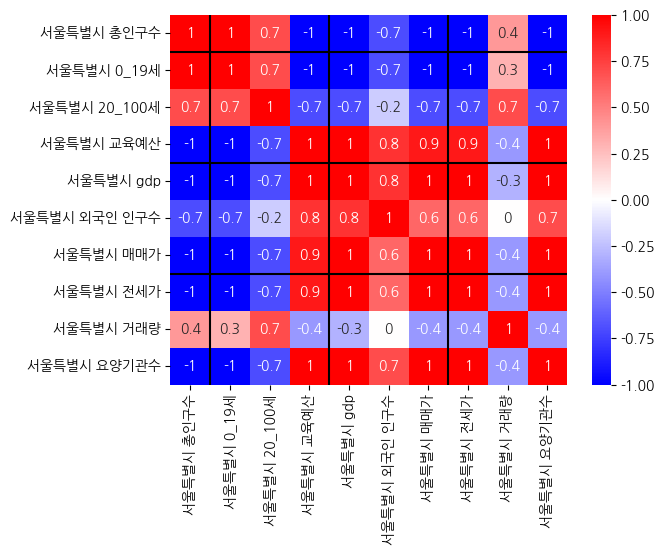

In [27]:
seoul_corr_matrix=df_list[0].corr().round(1)
sns.heatmap(data=seoul_corr_matrix,annot=True,cmap='bwr')
for x in range(1, 10, 3):
    plt.vlines(x, 0, seoul_corr_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, seoul_corr_matrix.shape[0], colors='black', linestyles='solid')

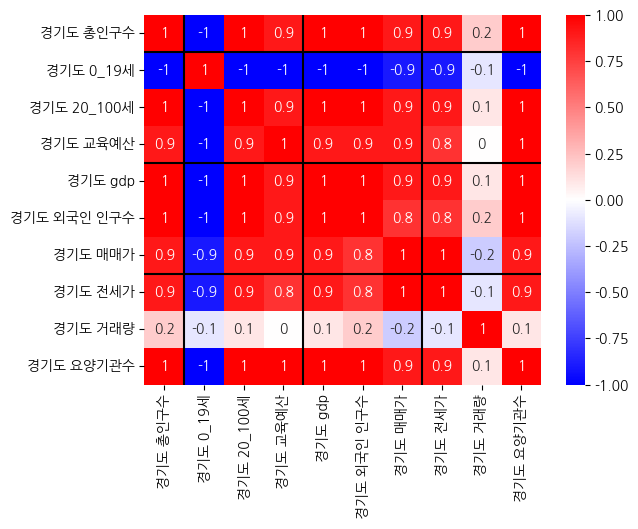

In [28]:
gyeonggi_corr_matrix=df_list[1].corr().round(1)
sns.heatmap(data=gyeonggi_corr_matrix,annot=True,cmap='bwr')
for x in range(1, 10, 3):
    plt.vlines(x, 0, gyeonggi_corr_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, gyeonggi_corr_matrix.shape[0], colors='black', linestyles='solid')

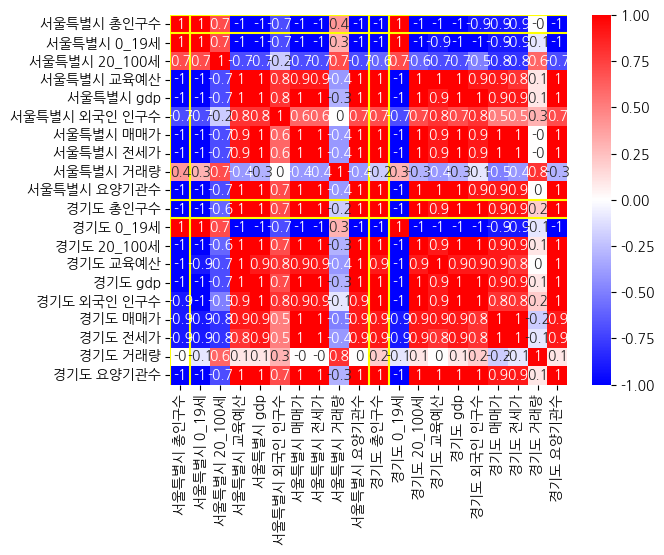

In [36]:
total_corr_matrix=df_concat.corr().round(1)
sns.heatmap(data=total_corr_matrix,annot=True,cmap='bwr')
for x in range(1, 20, 10):
    plt.vlines(x, 0, total_corr_matrix.shape[0], colors='yellow', linestyles='solid')
    plt.hlines(x, 0, total_corr_matrix.shape[0], colors='yellow', linestyles='solid')
for x in range(0, 20, 10):
    plt.vlines(x, 0, total_corr_matrix.shape[0], colors='yellow', linestyles='solid')
    plt.hlines(x, 0, total_corr_matrix.shape[0], colors='yellow', linestyles='solid')

변화율 correlation

In [ ]:
pop_sum_rate, 0_19_rate, 20_100_rate, 예산_rate, gdp_rate, pop_foreign_rate, price_rate, rent_rate, count_rate, 요양기관수_rate

In [45]:
city='서울특별시'
sql = """ select pop_sum_rate, 0_19_rate, 20_100_rate, 예산_rate, gdp_rate, pop_foreign_rate, price_rate, rent_rate, count_rate, 요양기관수_rate
     from seoul_pop_rate
     where year!=2013
        order by year
    
        ; 
    """

cur.execute(sql)
result = cur.fetchall()
# for line in result:
#     print(line)
seoul_rate=pd.DataFrame(result, columns=['{} 총인구수변화율'.format(city),'{} 0_19세변화율'.format(city),'{} 20_100세변화율'.format(city),'{} 교육예산변화율'.format(city),'{} gdp변화율'.format(city),'{} 외국인 인구수변화율'.format(city),'{} 매매가변화율'.format(city),'{} 전세가변화율'.format(city),'{} 거래량변화율'.format(city),'{} 요양기관수변화율'.format(city),])
# remote.commit()

In [42]:
seoul_rate.head()

,서울특별시 총인구수변화율,서울특별시 0_19세변화율,서울특별시 20_100세변화율,서울특별시 교육예산변화율,서울특별시 gdp변화율,서울특별시 외국인 인구수변화율,서울특별시 매매가변화율,서울특별시 전세가변화율,서울특별시 거래량변화율,서울특별시 요양기관수변화율
0,-0.0040,-0.0347,0.0031,0.005371,0.0151,0.0491,0.0158,0.0455,-0.0019,0.005947
1,-0.0080,-0.0378,-0.0014,0.033735,0.0292,-0.0168,0.0536,0.1368,0.2233,0.012189
2,-0.0091,-0.0416,-0.0022,0.040467,0.0284,-0.0099,0.0173,0.0254,0.1935,0.011039
3,-0.0074,-0.0427,-0.0001,0.020559,0.0234,0.0245,0.2123,0.2330,0.0376,0.012544
4,-0.0093,-0.0478,-0.0017,0.126565,0.0360,0.0786,0.0707,0.0000,-0.4698,0.012936


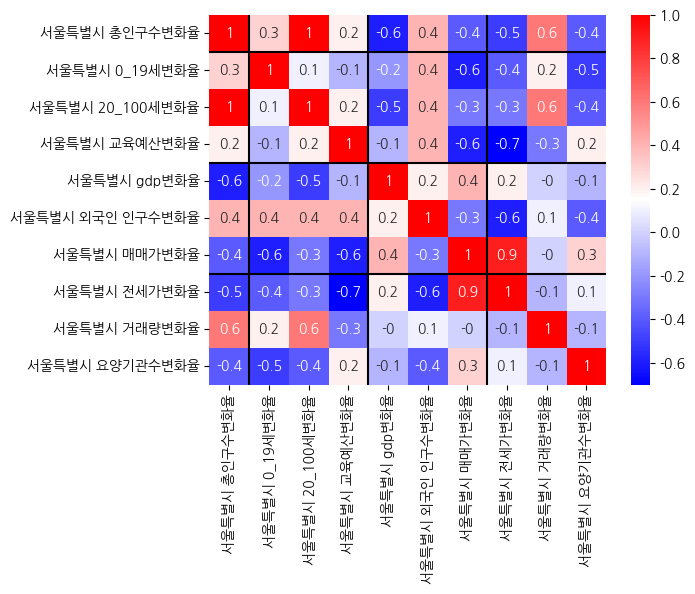

In [43]:
seoul_rate_matrix=seoul_rate.corr().round(1)
sns.heatmap(data=seoul_rate_matrix,annot=True,cmap='bwr')
for x in range(1, 10, 3):
    plt.vlines(x, 0, seoul_rate_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, seoul_rate_matrix.shape[0], colors='black', linestyles='solid')

In [46]:
city='경기도'
sql = """ select pop_sum_rate, 0_19_rate, 20_100_rate, 예산_rate, gdp_rate, pop_foreign_rate, price_rate, rent_rate, count_rate, 요양기관수_rate
     from gyeonggi_pop_rate
     where year!=2013
        order by year
    
        ; 
    """

cur.execute(sql)
result = cur.fetchall()
# for line in result:
#     print(line)
gyeonggi_rate=pd.DataFrame(result, columns=['{} 총인구수변화율'.format(city),'{} 0_19세변화율'.format(city),'{} 20_100세변화율'.format(city),'{} 교육예산변화율'.format(city),'{} gdp변화율'.format(city),'{} 외국인 인구수변화율'.format(city),'{} 매매가변화율'.format(city),'{} 전세가변화율'.format(city),'{} 거래량변화율'.format(city),'{} 요양기관수변화율'.format(city),])
# remote.commit()

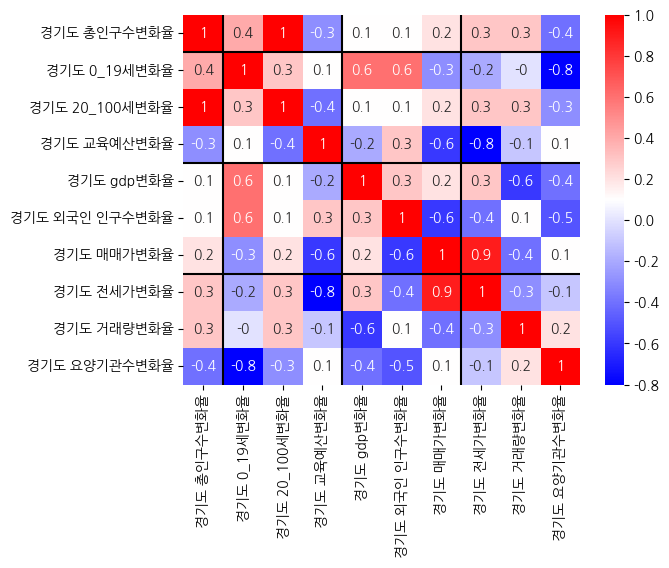

In [47]:
gyeonggi_rate_matrix=gyeonggi_rate.corr().round(1)
sns.heatmap(data=gyeonggi_rate_matrix,annot=True,cmap='bwr')
for x in range(1, 10, 3):
    plt.vlines(x, 0, gyeonggi_rate_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, gyeonggi_rate_matrix.shape[0], colors='black', linestyles='solid')